Domain – Healthcare

Context - 

Heart Disease is among the most prevalent chronic diseases in the United States, impacting millions of Americans each year and exerting a significant financial burden on the economy. In the United States alone, heart disease claims roughly 647,000 liveseach year — making it the leading cause of death. The buildup of plaques inside larger coronary arteries, molecular changes associated with aging, chronic inflammation, high blood pressure, and diabetes are all causes of and risk factors for heart disease.
The Centers for Disease Control and Prevention has identified high blood pressure, high blood cholesterol, and smoking as three key risk factors for heart disease. Roughly half of Americans have at least one of these three risk factors. The National Heart, Lung, and Blood Institute highlights a wider array of factors such as Age, Environment and Occupation, Family History and Genetics, Lifestyle Habits, Other Medical Conditions,

Race or Ethnicity, and Sex for clinicians to use in diagnosing coronary heart disease.Diagnosis tends to be driven by an initial survey of these common risk factors followed by bloodwork and other tests.

“AIHealth” is a new age startup laying foundations in the healthcare domain by solving some of the most prominent problems by using Data Science and Machine Learning.

They are using a lot of open source data to do a lot of experimentation. You were recently hired as a Data Scientist in their research team and your role is to create a model to determine probability for a patient having heart disease or attack.

Objective

•Provide the best performing model to determine probability for a patient having a heart disease or attack.

•Providing the most important drivers for a heart disease or attack.Data 

Description

The data provided consists of the following Data Dictionary

-HeartDiseaseorAttack: Target variable determining whether patient had prior heart disease or heartattack.
-HighBP: Binary flag determining whether a patient has high blood pressure.
-HighChol: Binary flag determining whether a patient has high cholesterol levels.
-BMI: Numeric value representing the Body Mass Index.
-Smoker: Binary flag determining whether a patient smokes or not.
-Diabetes: Binary flag determining whether a patient has diabetes or not.
-Fruits: Binary flag determining whether a patient consumes fruits in daily diet or not.
-Veggies: Binary flag determining whether a patient consumes vegetables in daily diet or not
-HvyAlcoholConsump: Binary flag determining whether a patient is a heavy consumer of alcohol.
-MentHlth: Numeric value representing mental fitness,ranging from 0 to 30.
-PhysHlth: Numeric value representing physical fitness,ranging from 0 to 30.
-Sex: Determining gender of the patient.
-Age: The age of the patient binned in to buckets between 1 - 13
-Education: The education level of the patient binned in to buckets between 1 - 6.
-Income: The income of the patient binned in to buckets between 1 - 8

Steps and Tasks

-import libraries and load dataset
-Exploratory Data Analysis:
    -Including univariate analysis to understand the distribution of features.
    -Including multivariate analysis to determine the correlations and analysis of target variables.
    -To determine if new features can be created, based on the given data.
    -Layout binary classification experimentation space (i.e.determine the list of models you would like to experiment with)
    -Using precision - recall curves to determine best threshold.
    -Publish the performance of all the models on the samehold-out / testdataset.
    -List out the most important drivers of heart disease or attack.
    -Using techniques such as oversampling, undersampling to handleclass- imbalance
    -Additional: Using model pipeline to create end to end training and inference pipelines.
    


In [1]:
pip install imbalanced-learn

  Using cached imbalanced_learn-0.12.0-py3-none-any.whl (257 kB)
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


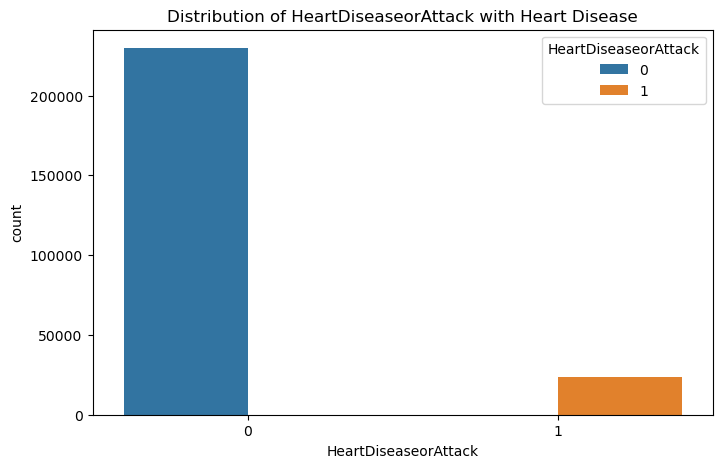

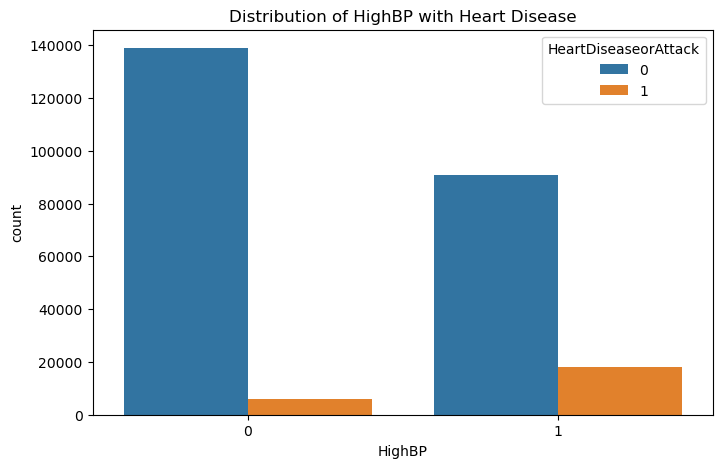

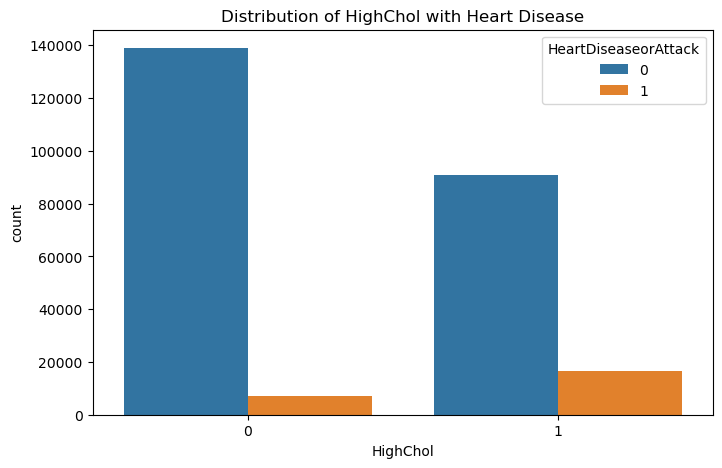

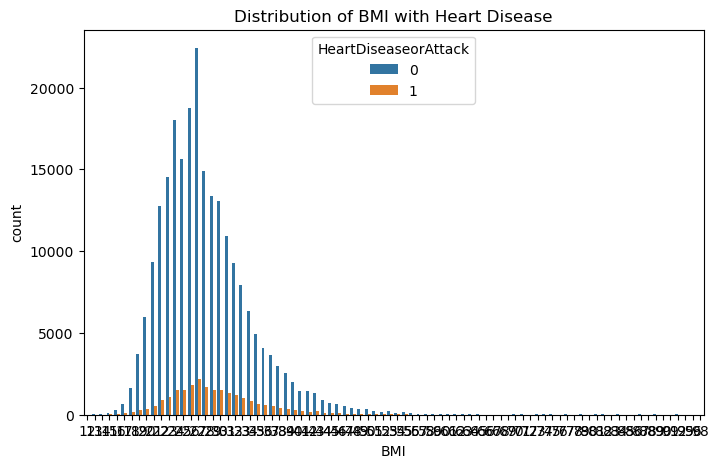

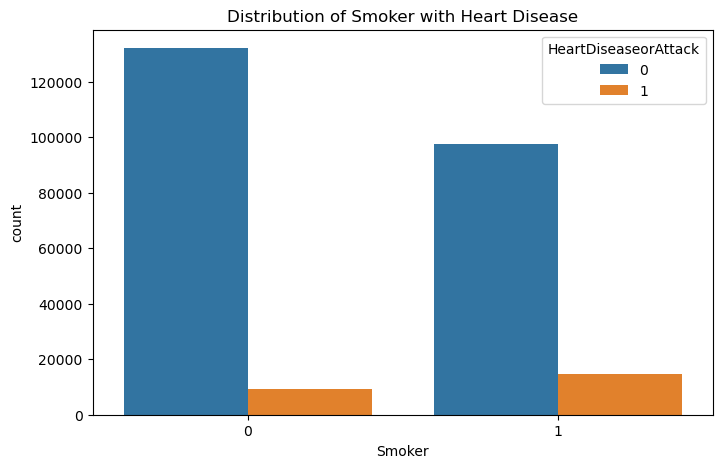

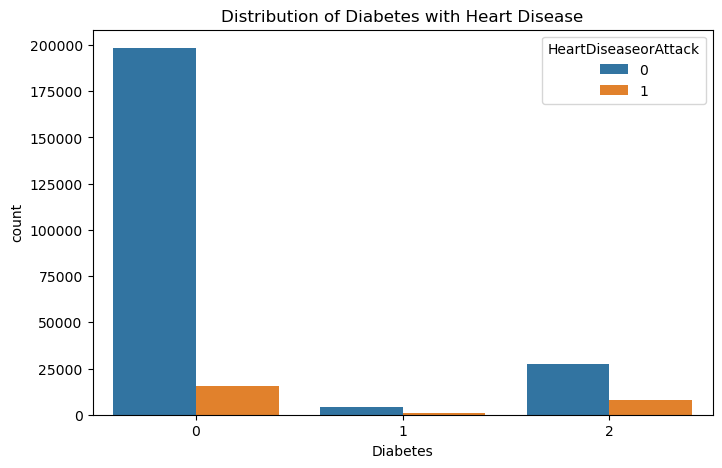

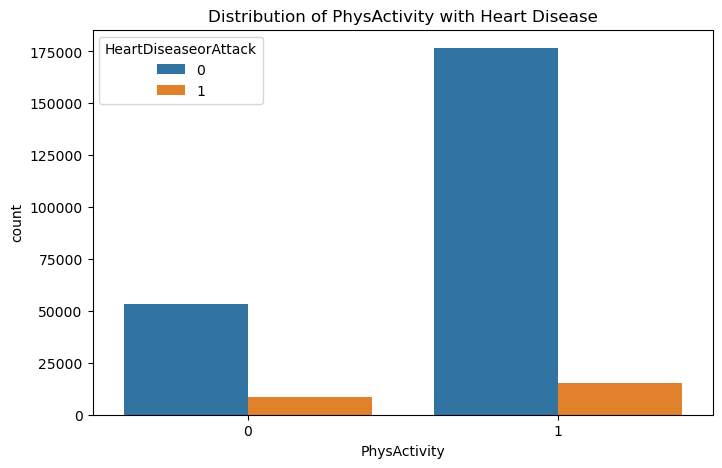

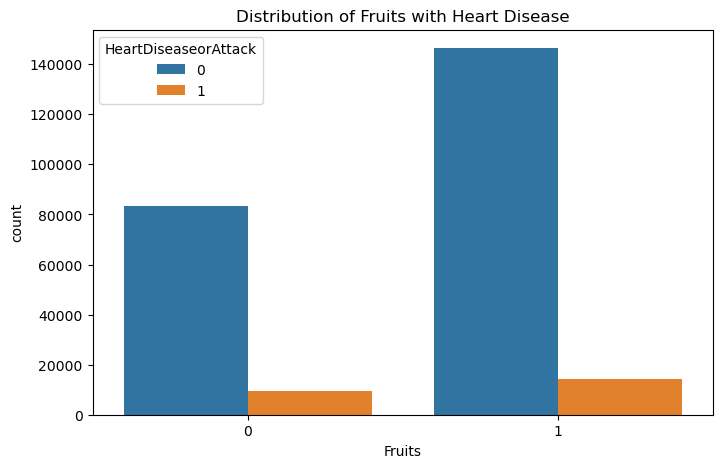

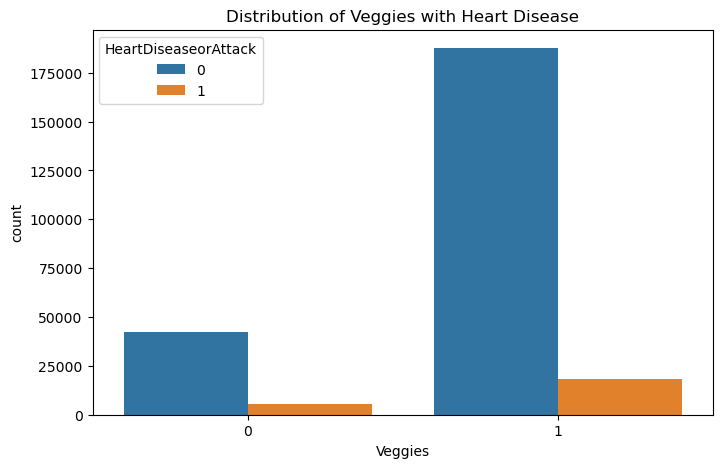

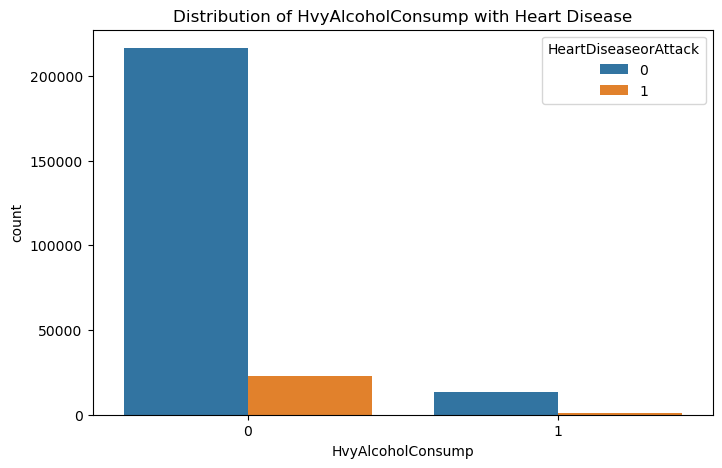

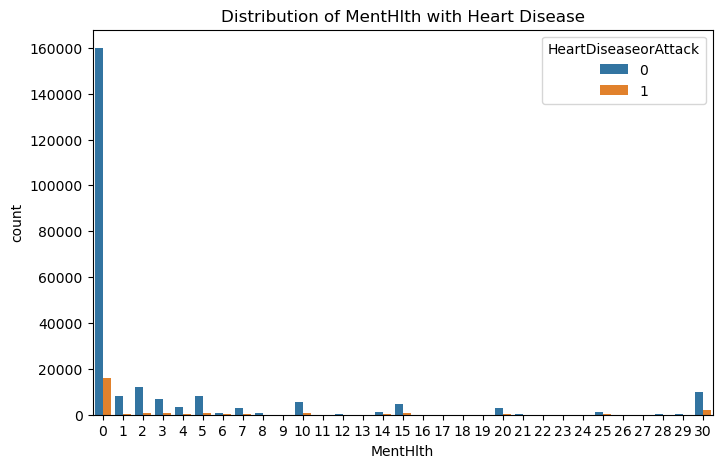

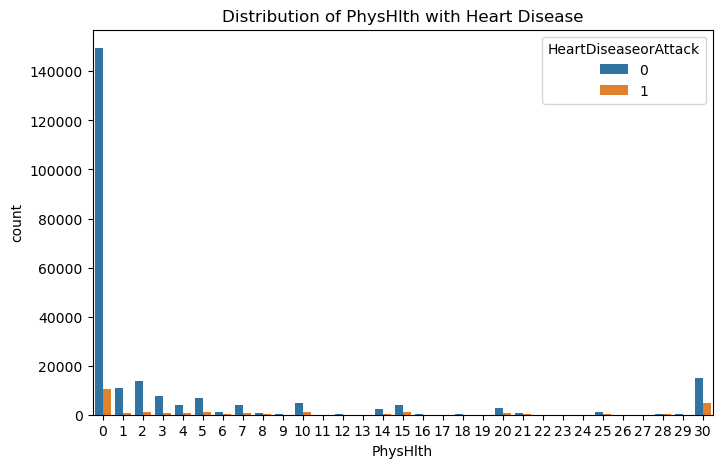

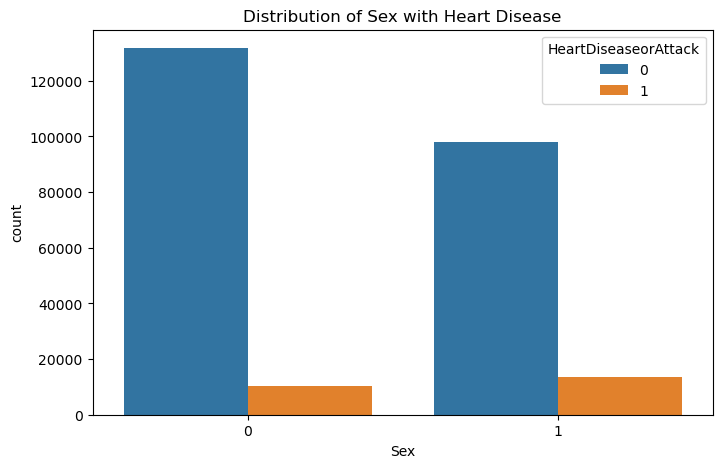

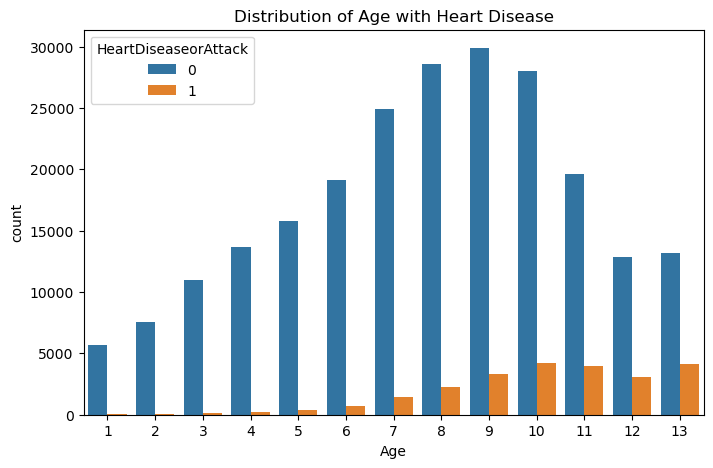

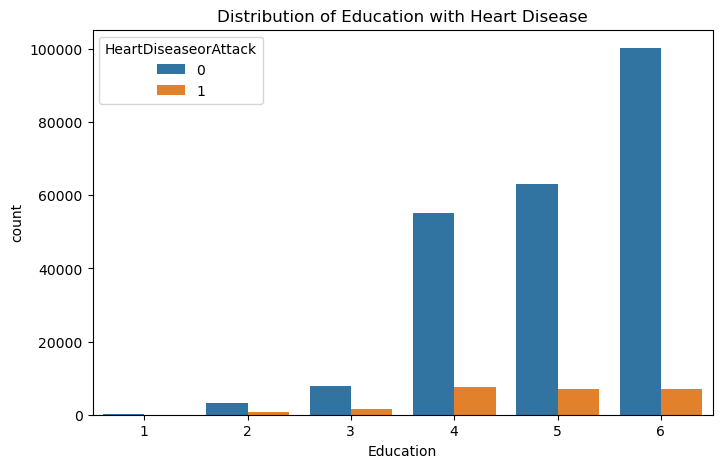

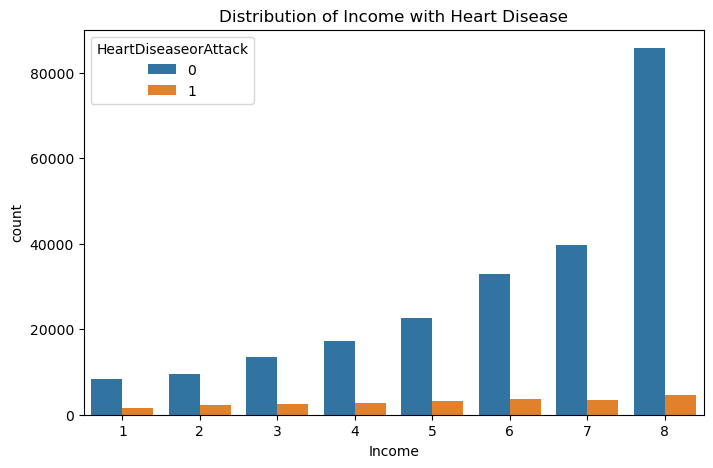

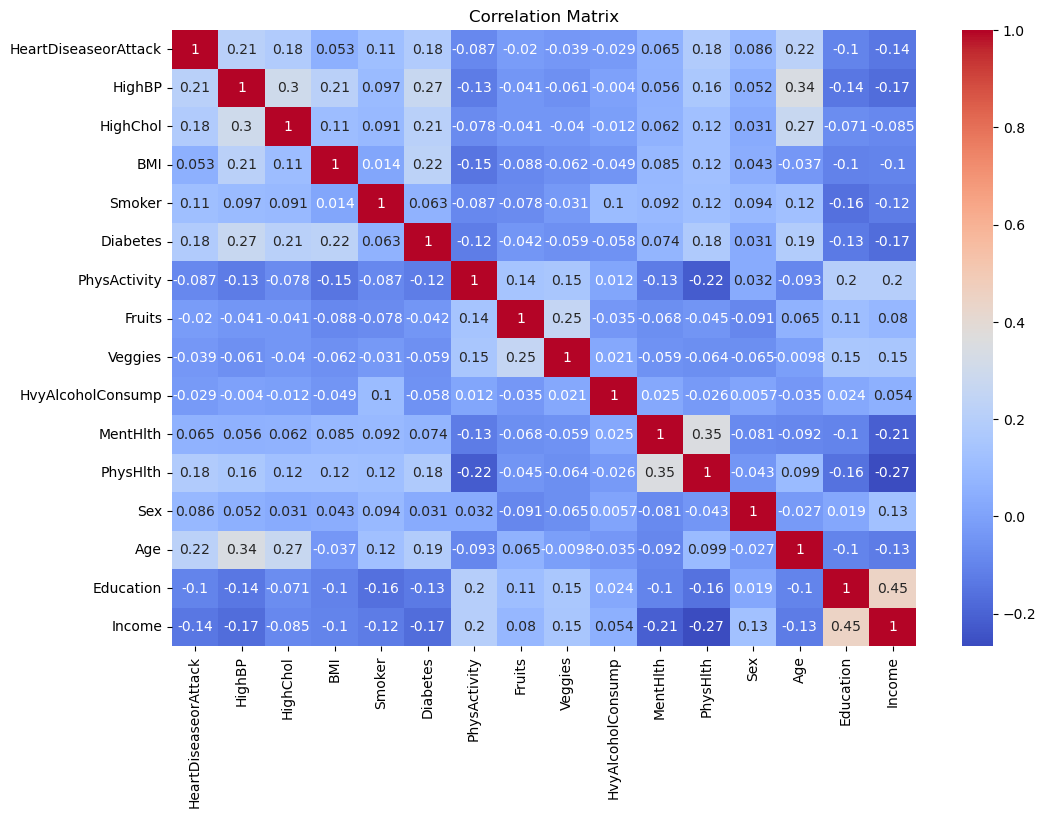

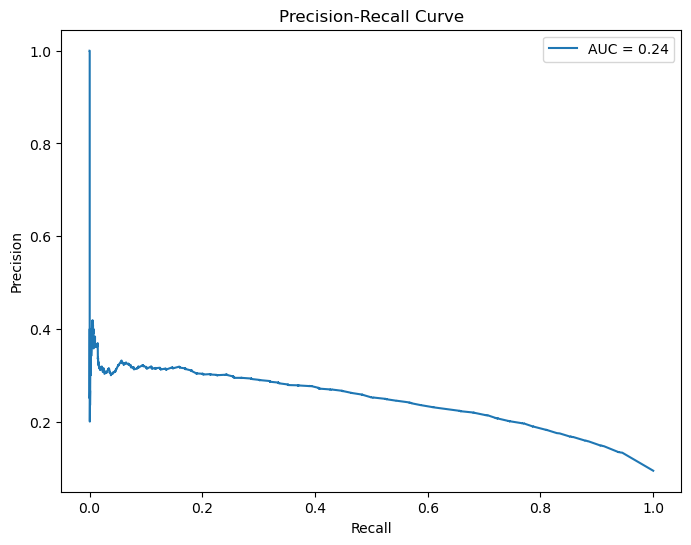

Most important drivers:
               Feature  Importance
2                 BMI    0.254932
12                Age    0.128207
14             Income    0.118103
10           PhysHlth    0.108644
13          Education    0.080268
9            MentHlth    0.079027
6              Fruits    0.033697
0              HighBP    0.031217
4            Diabetes    0.030593
7             Veggies    0.028027
5        PhysActivity    0.027179
1            HighChol    0.026698
11                Sex    0.023192
3              Smoker    0.020763
8   HvyAlcoholConsump    0.009453


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Load dataset
data = pd.read_csv ('HeartDisease.csv')

# Exploratory Data Analysis
# Univariate Analysis
for column in data.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=column, data=data, hue="HeartDiseaseorAttack")
    plt.title(f'Distribution of {column} with Heart Disease')
    plt.show()

# Multivariate Analysis
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

# Feature Engineering - Creating new features if required

# Layout binary classification experimentation space
X = data.drop("HeartDiseaseorAttack", axis=1)
y = data["HeartDiseaseorAttack"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model experimentation - Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
area_under_curve = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AUC = {area_under_curve:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# List out the most important drivers of heart disease or attack
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("Most important drivers:\n", feature_importances)

# Handle class imbalance using SMOTE and RandomUnderSampler
pipeline = Pipeline([
    ('oversample', SMOTE(sampling_strategy=0.5)),
    ('undersample', RandomUnderSampler(sampling_strategy=0.8)),
    ('model', RandomForestClassifier(random_state=42))
])

pipeline.fit(X_train_scaled, y_train)
y_pred_resampled = pipeline.predict(X_test_scaled)

# Evaluate model performance after resampling
accuracy_resampled = accuracy_score(y_test, y_pred_resampled)
conf_matrix_resampled = confusion_matrix(y_test, y_pred_resampled)
classification_rep_resampled = classification_report(y_test, y_pred_resampled)

# Model Pipeline - Training and Inference
pipeline.fit(X_train, y_train)
y_pred_pipeline = pipeline.predict(X_test)

# Evaluate model performance using pipeline
accuracy_pipeline = accuracy_score(y_test, y_pred_pipeline)
conf_matrix_pipeline = confusion_matrix(y_test, y_pred_pipeline)
classification_rep_pipeline = classification_report(y_test, y_pred_pipeline)